### Name: Kayli Glidic

# Exoplanet Transit Modeling

   In astronomy, a transit is when a celestial body passes directly between a larger body and an observer. One method of extracting information from these distance systems is through relative flux data collected during "transits". During transits,  a fraction of the host stars light is blocked by the passing planet and is measurable to a distant observer. There are a variety of parameters of the system that can be determined from this small flux difference such as planet radius, transit duration, etc. Here however, we will look at the geometry of such an event and model a light-curve of such a transit. 
    
    Below is are labeled phases of a transit: ingress, full transit, egress. Ingress is the apparent entrance of a smaller body upon the disk of a larger one as the smaller passes between the larger and the observer. Egress is the apparent exit of a smaller body upon the disk of a larger one as the smaller passes between the larger and the observer. A full transit is when the smaller body is fully or entirely upon the disk of a larger one as the smaller passes between the larger and the observer.
    

<img src="Independent Research/transit.jpg" width="700">


In this case we will concern ourselves with a circular orbit rather than an elliptical orbit. Also, this system is normalized by the radius of the host star. Therefore:

$$ R_{planet}=k=\frac{R_{planet}}{R_*}$$

and the radius o the star is taken to be

$$ R_* = 1.$$.



In order to model a transiting light-curve, one must look at the geometry of the system. First, we want to look at how the flux changes with respect to the transit phase. Given that we have normalized the system, we are interested in the ratio of the fluxes, $f=\frac{\Delta F}{F_*}$ and the area blocked out by the planet is proportional to the amount of light blocked. So during a full transit, the the amount of light blocked is proportional to the area of the face of the exoplanet (a circle) normalized by the stellar disk area:

$$f(full transit)=Area_{R_*} - Area_{R_{planet}} = 1 - k^2$$

If the planet is out of transit then:

$$f(out of transit)=Area_{R_*} - Area_{R_{planet}} = 1. $$


Now for the egress and ingress areas, it is a bit more complicated. An image of the interesection of two circles is provided below.  



<img src="Independent Research/ingress_egress geometry_fix.jpg" width="700">

Here $x$ is the distance between the centers of two circles, $k$ is the normalized radius of the planet, $R_*$ is the normalized radius of the host star,$\alpha_1$ and $\alpha_2$ represent angles, and $A_1$ and $A_2$ represent two fraction of the intersecting area. The goal is to find $A_1$ and $A_2$ then multiply this value by 2 (because symmetry) to obtain the entire intersection area. First we need to calculate the angles based on the values of $k$ and $R_*$ using Law of Cosines:

$$ \alpha_1 = \arccos[\frac{(s^2+k^2-R_*^2)}{2sk}]$$
$$ \alpha_2 = \arccos[\frac{(s^2+R_*^2-k^2)}{2sR_*}].$$

The area $A_1$ and $A_2$ can be solved by finding the area swepts out by the arc and then subtracting the triangle from it. 
$$A_1 = A_{arc}-A_{traingle} = \frac{\alpha_1}{180}(\frac{\pi k^2}{2})-\frac{1}{2}(k\cos(\alpha_1))(k\sin(\alpha_1))$$
$$A_2 = A_{arc}-A_{traingle} = \frac{\alpha_2}{180}(\frac{\pi R_*^2}{2})-\frac{1}{2}(R_*\cos(\alpha_2))(R_*\sin(\alpha_2))$$

The final and total area is then:
$$A_{total} = 2(A_1 +A_2)$$

Therefore, the flux for these areas of interesction is: 
$$ f(ingress & egress)= Area_{R_*} - Area_{R_{planet}} = 1 - \frac{A_{total}}{\pi}$$

remembering that the area is normalized by the area of the stellar disk $\pi$. One last thing to note is that the value of this intersection will constantly change depending on the value of $x$, the distance from center to center of both bodies. Below is a top-down view and a front view of an orbiting system to demonstrate how the value of $x$ changes throughout the orbit. 

<img src="Independent Research/top down view.jpg" width="700">

<img src="Independent Research/front view.jpg" width="700">

As demonstrated in the front view, as the planet transits, the projected distance between the centers $s$ changes. When both align, the distance is zero but the value of the semi-major axis does not change (circular orbit) $a$. As seen in the top down view the value of $s$ changes as a result of the angle changes. Using gemoetry we know that $s$ then equals:
$$ s = a\cos(\theta).$$

We can now take this value of $s$ and use it to find the values of $x$, the actual center to center distance, which we need to calculate the intersection area. Using geometry once again we can find this distance $x$ with:
$$ x = \sqrt(b^2+s^2) = \sqrt(b^2+ (a\cos(\theta))^2$$

Notice that when $s$ is aligned with the host star it equals zero. Therefore at this point, $\theta = \frac{\pi}{2}$. This is also the point when $x=b$ the impact parameter. When $\theta = 0$ is when $x =a$ the farthest distance at the semi-major axis length. 

In [54]:
import numpy as np
import astropy.units as u

def distance_vs_time(Rplanet,Rstar,a,P,t,i=90):
    """
    Parameters
    ----------
    
    Rplanet: float
        Radius of the exoplanet (in units Rjupiter)
    Rstar: float
        Radius of the host star (in units Rsun)
    a: float
        Semi-major axis (in units of au)
    P: float
        Orbital Period
    t: array 
        Time in Julian days
    i: float
        Inclination in degrees
    """
    
    #define parameters:
    
    #planet radius in units of RJupiter and radius of star in Rsun
    Rplanet = Rplanet * u.Rjupiter
    Rstar = Rstar *u.Rsun
    
    #semi-major axis in stellar radii
    a = ((a * u.au)/Rstar).si.value
    
    #normalized planet radius
    k = (Rplanet/Rstar).si.value
    #normalized star radius
    R_star = 1
    
    b_transit = (a*np.cos(i*np.pi/180)/R_star)#for a circle      #*((1-e**2)/(1+e*np.sin(omega)))
    
    #duration of transit
    t_full = (P/np.pi)*np.arcsin((R_star/a)*(np.sqrt((1+k)**2-b_transit**2))/np.sin(i*np.pi/180))
    
    
    #time in middle of transit
    t_m =0
    
    
    #when d = R_planet+R_star (when the points on the two circles touch) we can calculate the horizontal distance x:
    
    #Horizontal distance traveled. 
    x = np.sqrt((1+k)**2+b_transit**2)
    

    #Calculate velocity v = x*t (here the total distance is 2*x and t_full is the duration of the transit) 
    #v = 2*x/t_full
    v = (2*np.pi*a)/P
    
    #Define d as a function of time to model the position of the exoplanet as it transits across the face of the stellar disk
    
    d = np.array(np.sqrt((v**2)*(t-t_m)**2+(b_transit)**2))

    return d

In [43]:
import numpy as np
import astropy.units as u

def distance_vs_time(Rplanet,Rstar,a,P,t,i=90):
    """
    Parameters
    ----------
    
    Rplanet: float
        Radius of the exoplanet (in units Rjupiter)
    Rstar: float
        Radius of the host star (in units Rsun)
    a: float
        Semi-major axis (in units of au)
    P: float
        Orbital Period
    t: array 
        Time in Julian days
    i: float
        Inclination in degrees
    """
    
    #define parameters:
    
    #planet radius in units of RJupiter and radius of star in Rsun
    Rplanet = Rplanet * u.Rjupiter
    Rstar = Rstar *u.Rsun
    
    #semi-major axis in stellar radii
    a = ((a * u.au)/Rstar).si.value
    
    #normalized planet radius
    k = (Rplanet/Rstar).si.value
    #normalized star radius
    R_star = 1
    
    b_transit = (a*np.cos(i*np.pi/180)/R_star)#for a circle      #*((1-e**2)/(1+e*np.sin(omega)))
    
   
    #define the angle range of the orbit 0 to pi. it technically goes to 2pi but if we only want to look at the transit portion.  
    #theta = np.linspace(0,2*np.pi,len(t))
    
    theta = np.pi/2+(t/P)*(2*np.pi)
    
    result = []
    #pts = theta > np.pi
    #result[pts] = theta * 5
    
    for i in theta:
    
        if (i > np.pi ) & (i < 2 * np.pi):
            d = np.inf
            result.append(d)
            
        else:
            #solave for the projected center to center distance dependent on the angle
            s = a*np.cos(i)

            #define the actual center to center distance needed to find intersection area. 
            d = np.array(np.sqrt(s**2+(b_transit)**2))
            result.append(d)




    return result

In [50]:
def flux(Rplanet,Rstar,d):
    
    #define parameters:
    
    #planet radius in units of RJupiter and radius of star in Rsun
    Rplanet = Rplanet * u.Rjupiter
    Rstar = Rstar *u.Rsun
    
    #normalized planet radius
    k = (Rplanet/Rstar).si.value
    #normalized star radius
    R_star = 1
    
    #Calculate flux:
    flux_array=[]
    
    for j in d:
        
        if j==np.inf:
            flux = 1
            flux_array.append(flux)

        # One circle is entirely enclosed in the other.
        elif j <= abs(R_star-k):
            flux = (1 - k**2)
            flux_array.append(flux)
        # The circles don't overlap at all.
        elif j > (R_star + k):
            flux = 1
            flux_array.append(flux)
            
        elif abs(R_star-k)<j<=(R_star + k):
            #calculate the angles of intersection return radians
            angle_1 = np.arccos((k**2+j**2-R_star**2)/(2*k*j))
            angle_2 = np.arccos((R_star**2-k**2+j**2)/(2*j*R_star))
          
            #Calculate the area of intersection parts angles in radians
            A_1 = (0.5*angle_1*k**2)- 0.5*(k*np.cos(angle_1))*(k*np.sin(angle_1))
            A_2 = (0.5*angle_2*R_star**2)- 0.5*(R_star*np.cos(angle_2))*(R_star*np.sin(angle_2))
            
            #Calculate total intersection area based on symmetry. 
            intersection_area = 2*(A_1+A_2)
            
            #total area of planet:
            #planet_area =np.pi*k**2
            
            #fraction of area in front of host star
            #fraction_area = intersection_area/planet_area
            
            flux = (1-intersection_area/np.pi)
            flux_array.append(flux)
        else:
            flux = np.nan
            print("No Flux Found")
    return flux_array

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


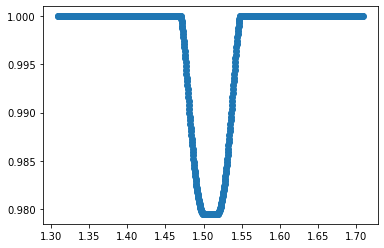

In [52]:
import matplotlib.pyplot as plt

t=np.linspace(-0.2+1.5089682,0.2+1.5089682,1000)

d = distance_vs_time(1.715,1.230,0.02752,1.5089682,t,i=80)

flux_normalized = flux(1.715,1.230,d)

plt.plot(t,flux_normalized,'o')

flux_normalized
#d.shape

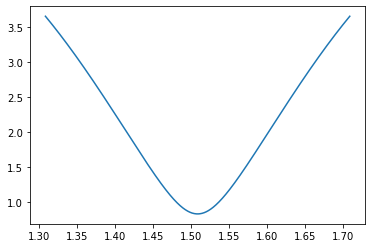

In [53]:
plt.plot(t,d)

In [54]:
len(flux_normalized)

1000